In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
#from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date.date)

2017-08-23


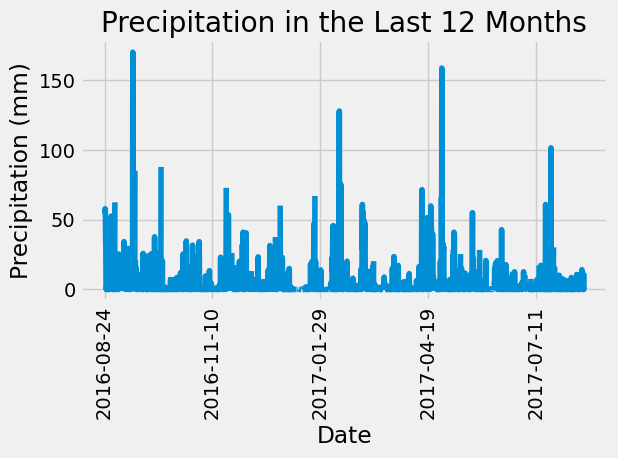

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in the data set.
latest_date = session.query(func.max(Measurement.date)).scalar()
date = dt.datetime.strptime(latest_date, "%Y-%m-%d")
one_year_ago = date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores.
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame.
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
df = df.sort_values('Date')
# Plot the results.
df.plot(x='Date', y='Precipitation', legend=False)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation in the Last 12 Months')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation'].describe()

print(summary_stats)

count    2015.000000
mean        4.485112
std        11.690532
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(Station.name).count()
print(stations_count)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Perform a query to find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the stations and their counts in descending order
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [14]:
# Set the most active station ID
most_active_station = "USC00519281"

# Retrieve the lowest, highest, and average temperature for the most active station
results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).\
    first()

# Extract the results
lowest_temp = results[0]
highest_temp = results[1]
avg_temp = results[2]

# Print the results
print(f"For the most active station {most_active_station}:")
print(f"Lowest Temperature: {lowest_temp} F")
print(f"Highest Temperature: {highest_temp} F")
print(f"Average Temperature: {avg_temp} F")

For the most active station USC00519281:
Lowest Temperature: 12.2 F
Highest Temperature: 29.4 F
Average Temperature: 22.03582251082252 F


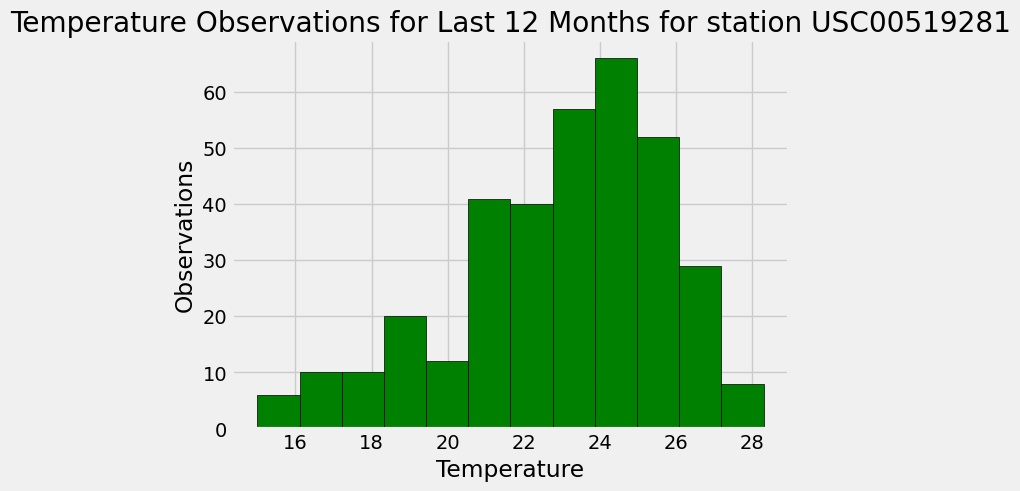

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Query the temperature observations for the last 12 months for the most_active_station
results = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

#Create temperatures list
temperatures = []
# Retrieve temperatures and append to list

for result in results:
    temperatures.append(result[0])

# Plot the temperature data as a histogram
plt.hist(temperatures, bins=12, color='green', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Observations')
plt.title(f"Temperature Observations for Last 12 Months for station {most_active_station}")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()